In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as op
import numpy as np

sns.set_context("talk")

def linfit(x, a, b):
    return a *x + b

/usr/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
anscombe1 = np.array([(10.0, 8.04),  
                      (8.0,  6.95),  
                      (13.0, 7.58),  
                      (9.0,  8.81),  
                      (11.0, 8.33),  
                      (14.0, 9.96),  
                      (6.0,  7.24),  
                      (4.0,  4.26), 
                      (12.0, 10.84), 
                      (7.0,  4.82),  
                      (5.0,  5.68)])

anscombe2 = np.array([(10.0, 9.14),  
                      (8.0,  8.14),  
                      (13.0, 8.74),  
                      (9.0,  8.77),  
                      (11.0, 9.26),  
                      (14.0, 8.10),  
                      (6.0,  6.13),  
                      (4.0,  3.10),
                      (12.0, 9.13),  
                      (7.0,  7.26),  
                      (5.0,  4.74)]) 

anscombe3 = np.array([(10.0, 7.46),  
                      (8.0,  6.77),  
                      (13.0, 12.74), 
                      (9.0,  7.11),  
                      (11.0, 7.81),  
                      (14.0, 8.84),  
                      (6.0,  6.08),  
                      (4.0,  5.39),
                      (12.0, 8.15),  
                      (7.0,  6.42),  
                      (5.0,  5.73)])

anscombe4 = np.array([(8.0,  6.58),
                      (8.0,  5.76),
                      (8.0,  7.71),
                      (8.0,  8.84),
                      (8.0,  8.47),
                      (8.0,  7.04),
                      (8.0,  5.25),
                      (19.0, 12.50),
                      (8.0,  5.56),
                      (8.0,  7.91),
                      (8.0,  6.89)])

anscombes = [{'x': anscombe[:,0], 'y': anscombe[:,1]} 
                 for anscombe in [anscombe1, anscombe2, anscombe3, anscombe4]]

In [3]:
results = [ op.curve_fit(f = linfit,
                         xdata=anscombe['x'], ydata=anscombe['y'],
                         p0=(1,1))
                     for anscombe in anscombes]
for result in results:
    print result

slopes = [result[0][0] for result in results]
intercepts = [result[0][1] for result in results]
covariances = [result[1] for result in results]

(array([ 0.50009091,  3.00009091]), array([[ 0.01390171, -0.12511537],
       [-0.12511537,  1.26505538]]))
(array([ 0.5       ,  3.00090909]), array([[ 0.01391545, -0.12523901],
       [-0.12523901,  1.26630553]]))
(array([ 0.49972727,  3.00245453]), array([[ 0.01389514, -0.12505629],
       [-0.12505629,  1.26445805]]))
(array([ 0.49990909,  3.00172727]), array([[ 0.0138813 , -0.12493172],
       [-0.12493172,  1.26319846]]))


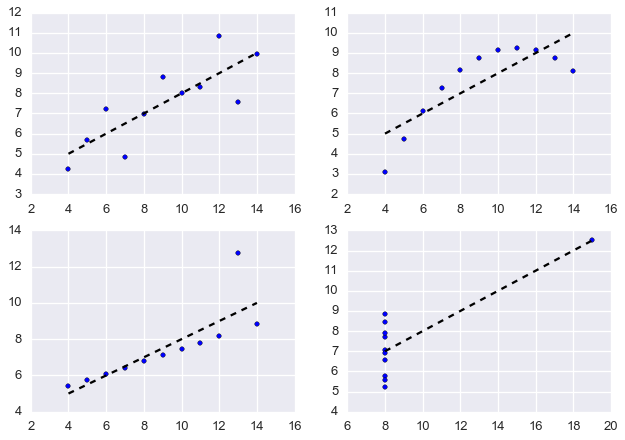

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for slope, intercept, axis, anscombe in zip(slopes, intercepts, axes.flatten(), anscombes):
    axis.scatter(anscombe['x'sults:
    print result], anscombe['y'])
    x = np.linspace(anscombe['x'].min(), anscombe['x'].max())
    axis.plot(x, linfit(x, slope, intercept), 'k--')

In [5]:
print "slopes:"
for slope in slopes:
    print slope
    
print 

print "intercepts:"
for intercept in intercepts:
    print intercept
    
print

print "covariances:"
for covariance in covariances:
    print covariance, "\n"

slopes:
0.500090909544
0.499999999999
0.499727273512
0.499909090908

intercepts:
3.00009090973
3.00090909091
3.00245453324
3.00172727273

covariances:
[[ 0.01390171 -0.12511537]
 [-0.12511537  1.26505538]] 

[[ 0.01391545 -0.12523901]
 [-0.12523901  1.26630553]] 

[[ 0.01389514 -0.12505629]
 [-0.12505629  1.26445805]] 

[[ 0.0138813  -0.12493172]
 [-0.12493172  1.26319846]] 



## What is the moral?